In [1]:
rm -rf /kaggle/working/color

In [2]:
cd /kaggle/working/

/kaggle/working


In [3]:
!git clone https://github.com/darshvader13/color.git

Cloning into 'color'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 236 (delta 72), reused 206 (delta 42), pack-reused 0
Receiving objects: 100% (236/236), 283.88 KiB | 13.52 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [1]:
import os
import sys
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
sys.path.insert(0, 'color')
sys.path.insert(0, './')

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.travis.yml',
 'color.pem',
 'ColorizeTrainingArtistic.ipynb',
 'deoldify',
 'environment.yml',
 'fastai',
 'fid',
 'finetune.ipynb',
 'ImageColorizer.ipynb',
 'models',
 'requirements-colab.txt',
 'requirements-dev.txt',
 'requirements.txt',
 'resource_images',
 'setup.py',
 'test_images',
 'tox.ini']

In [5]:
os.getcwd()

'C:\\Users\\dbala\\Desktop\\color\\deoldify\\DeOldify'

In [6]:
!pip install -r 'requirements.txt'
!pip install -r 'requirements-dev.txt'
!pip install -r 'requirements-colab.txt'

ERROR: Could not open requirements file: [Errno 2] No such file or directory: "'requirements.txt'"

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: "'requirements-dev.txt'"

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: "'requirements-colab.txt'"

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import torch
import torch.nn as nn
from fastai.vision import *
from deoldify.dataset import *
from deoldify.visualize import *
from deoldify.generators import *
from deoldify.critics import *
from deoldify.loss import *
import matplotlib.pyplot as plt

In [9]:
!set PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:64

In [11]:
bw_path = '/kaggle/input/colored-images/trainA/trainA'
color_path = '/kaggle/input/colored-images/trainB/trainB'

In [12]:
dataset = get_colorize_data(bs=4, sz=(400, 280), bw_path=bw_path, color_path=color_path, keep_pct=0.15)

In [13]:
!cp /kaggle/input/models/ColorizeArtistic_gen.pth /kaggle/working/color/models/
!cp /kaggle/input/models/ColorizeArtistic_crit.pth /kaggle/working/color/models/

In [14]:
generator = gen_learner_new(data=dataset, gen_loss=FeatureLoss().cuda(), root_folder=Path('/kaggle/working/color'), weights_name='ColorizeArtistic_gen')

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [10]:
generator = gen_learner_new(data=get_dummy_databunch(), gen_loss=F.l1_loss, root_folder=Path('./'), weights_name='ColorizeArtistic_gen')

In [12]:
generator_name = 'finetuned_default_generator'
generator = gen_learner_new(data=get_dummy_databunch(), gen_loss=F.l1_loss, root_folder=Path('./'), weights_name='ColorizeArtistic_gen').load(generator_name, with_opt=False)

In [13]:
rf_factor = 10
image_path = './test_images/547.jpg'

In [14]:
filtr = MasterFilter([ColorizerFilter(learn=generator)], render_factor=rf_factor)
vis = ModelImageVisualizer(filtr, results_dir='/kaggle/working/color/test_images')
post_img = vis.get_transformed_image(path=image_path, render_factor=rf_factor, watermarked=False)

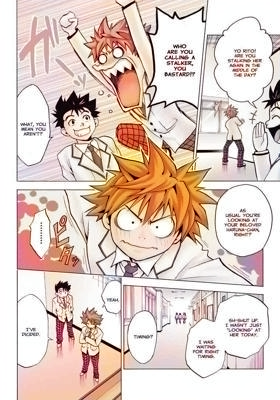

In [15]:
post_img

In [18]:
discriminator = colorize_crit_learner(dataset)
discriminator.model_dir = Path('/kaggle/working/color/models')
discriminator = discriminator.load('ColorizeArtistic_crit') #load the critic file 

In [19]:
#generator.load('/kaggle/input/finetunes_model/pytorch/1/1/finetuned_model') 

In [20]:
#generator = gen_learner_new(data=dataset, gen_loss=FeatureLoss().cuda(), root_folder=Path('/kaggle/working/color'), weights_name='ColorizeArtistic_gen').load(generator_name, with_opt=False)

In [21]:
#cd /kaggle/input/finetunes_model/pytorch/1/1

In [22]:
generator = gen_learner_new(data=dataset, gen_loss=F.l1_loss, root_folder=Path('/kaggle/working/color'), weights_name='ColorizeArtistic_gen') #.load(generator_name, with_opt=False)

Epoch 1


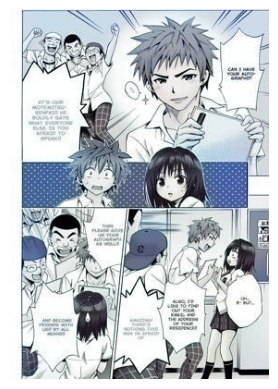

Epoch 2


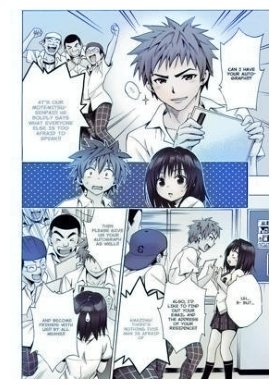

Epoch 3


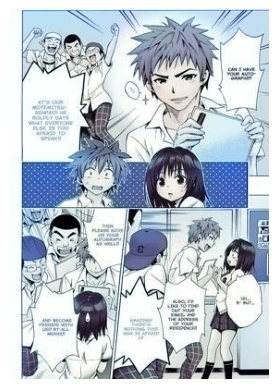

Epoch 4


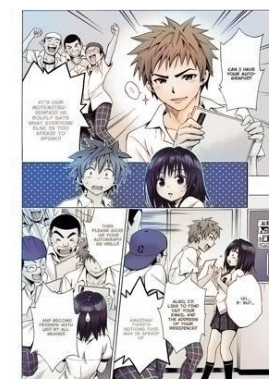

Epoch 5


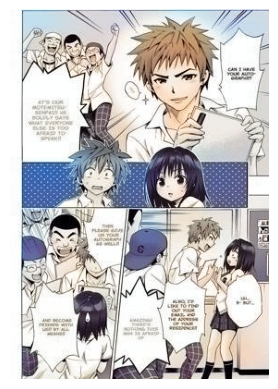

Epoch 6


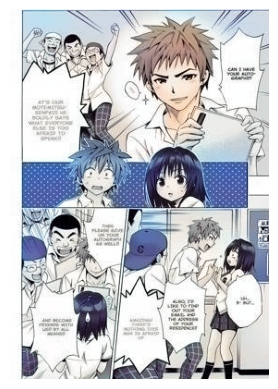

Epoch 7


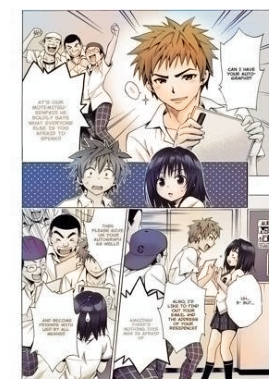

Epoch 8


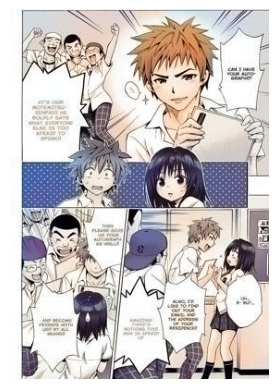

Epoch 9


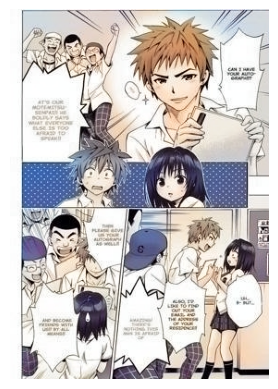

Epoch 10


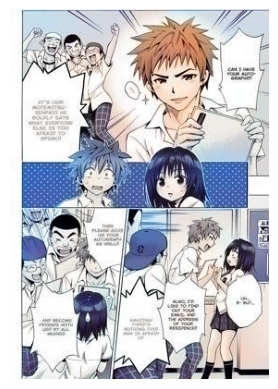

Epoch 11


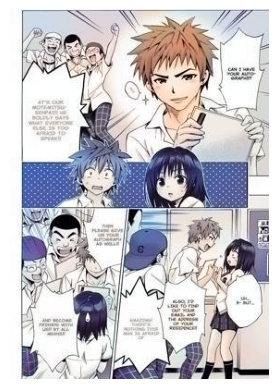

Epoch 12


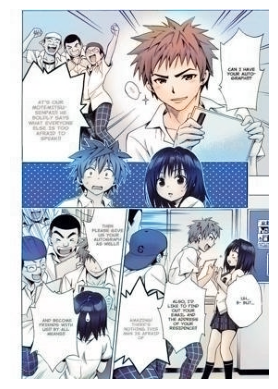

Epoch 13


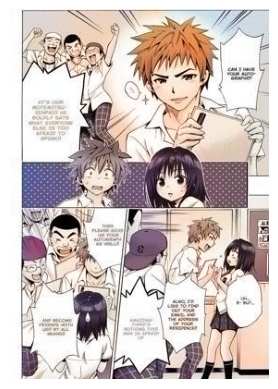

Epoch 14


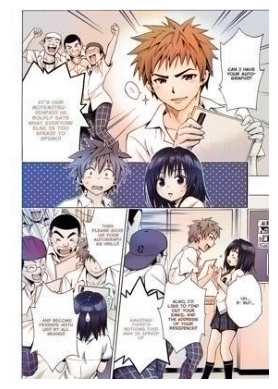

Epoch 15


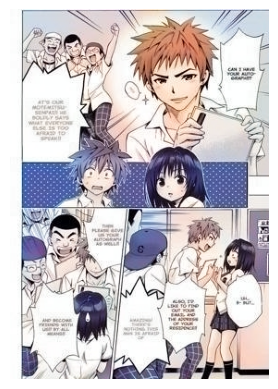

Epoch 16


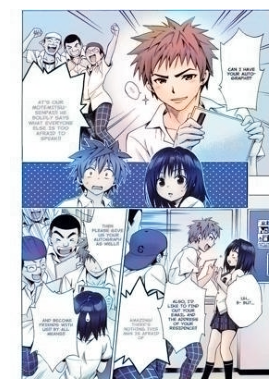

Epoch 17


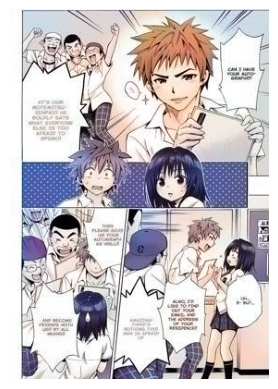

Epoch 18


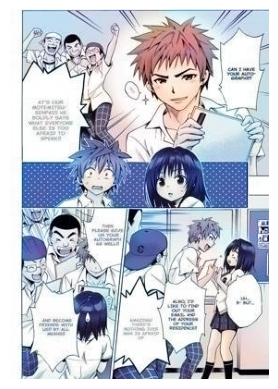

Epoch 19


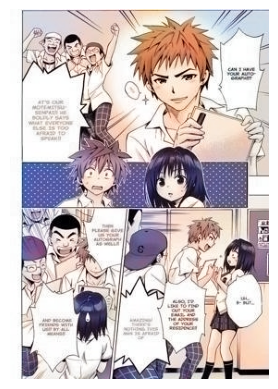

Epoch 20


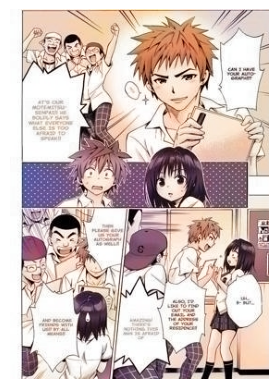

Epoch 21


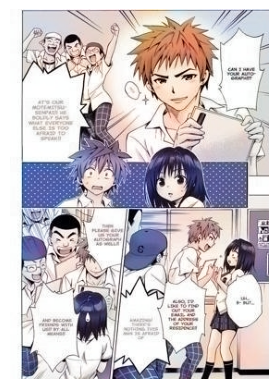

Epoch 22


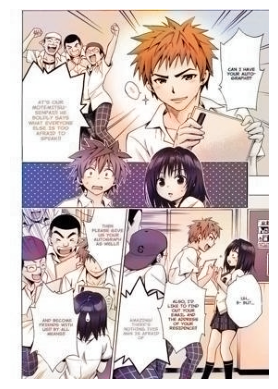

Epoch 23


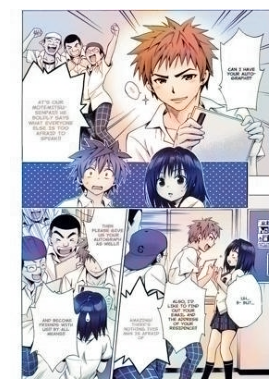

Epoch 24


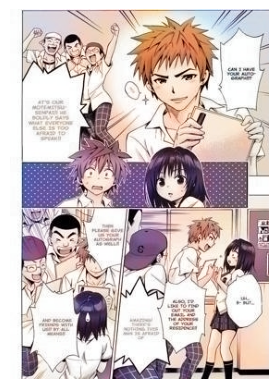

Epoch 25


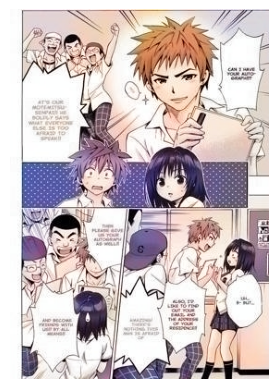

Epoch 26


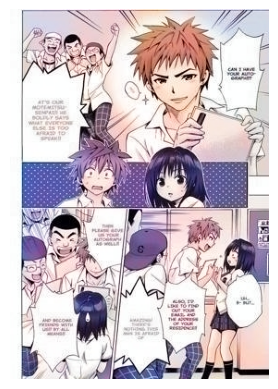

Epoch 27


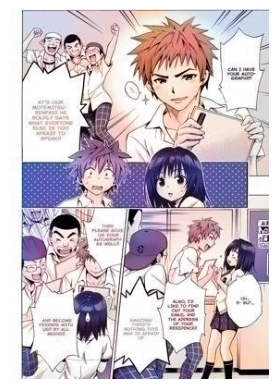

Epoch 28


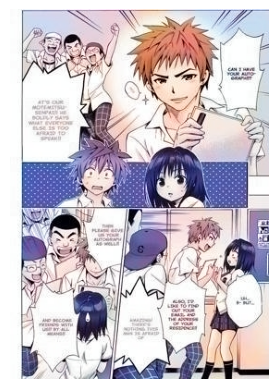

Epoch 29


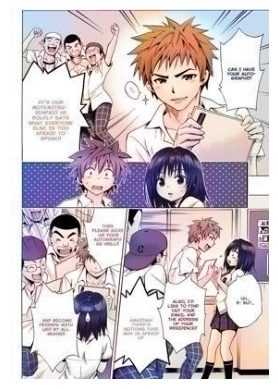

Epoch 30


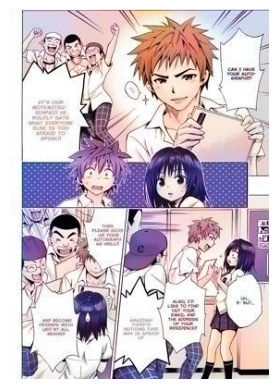

In [23]:
for i in range(30):
    print('Epoch ' + str(i+1))
    
    generator.fit_one_cycle(1, max_lr=slice(1e-4))
    generator_name = 'finetuned_default_generator.pth'
    generator.save(generator_name)
    
    #discrimator.fit_one_cycle(1, max_lr=slice(1e-4))
    #discriminator_name = f'finetuned_generator_{i}.pth'
    #discrimator.save(discriminator_name)
    
    filtr = MasterFilter([ColorizerFilter(learn=generator)], render_factor=rf_factor)
    vis = ModelImageVisualizer(filtr, results_dir='/kaggle/working/color/test_images')
    post_img = vis.get_transformed_image(path=image_path, render_factor=rf_factor, watermarked=False)
    generator = gen_learner_new(data=dataset, gen_loss=F.l1_loss, root_folder=Path('/kaggle/working/color'), weights_name='ColorizeArtistic_gen').load(generator_name, with_opt=False)

    plt.imshow(post_img)
    plt.axis('off') 
    plt.show()
    

In [24]:
#generator = gen_learner_new(data=dataset, gen_loss=F.l1_loss, root_folder=Path('/kaggle/working/color'), weights_name='ColorizeArtistic_gen').load(generator_name, with_opt=False)

In [25]:
'''


from PIL import Image

image_path_bw = '/kaggle/input/colored-images/trainA/trainA/12001.jpg'
image = Image.open(image_path_color).convert('RGB')

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

'''

"\n\n\nfrom PIL import Image\n\nimage_path_bw = '/kaggle/input/colored-images/trainA/trainA/12001.jpg'\nimage = Image.open(image_path_color).convert('RGB')\n\n# Display the image\nplt.imshow(image)\nplt.axis('off')  # Turn off axis numbers and ticks\nplt.show()\n\n"